In [2]:
import os
current_path = os.getcwd()
import sys
sys.path.append(current_path)
sys.path.append('./../../.')
import numpy as np
import math
from itertools import repeat
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm

## Compare anti-c fraction with different energy functions

In [3]:
# cos_energy_fraction = [2.255, 0.095, 1.519]
# well_energy_fraction = [1.905, 1.013, 1.519]
# cos_energy_fraction_3D = [1.786, 0.116, 0.825]
# iso_fraction = [0.0177]
# iso_fraction_3D = [0.0836]
cos_energy_fraction = [0.96, 0.0078, 0.55]
well_energy_fraction = [0.91, 0.73, 0.55]
cos_energy_fraction_3D = [1.786, 0.116, 0.825]
iso_fraction = [0.0]
iso_fraction_3D = [0.0836]
x = np.array([1,2,3])

<Figure size 432x288 with 0 Axes>

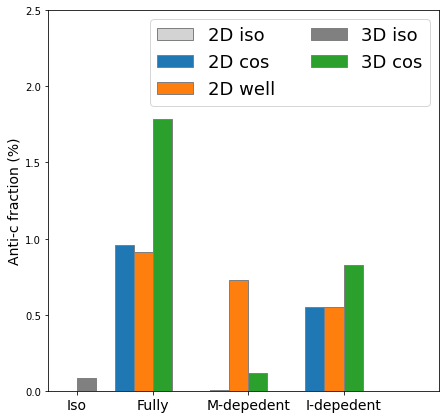

In [4]:

plt.figure()
fig = plt.figure(figsize=(7, 7))
xlim = [-0.1,4]
bar_width = 0.2
plt.bar(0.2-bar_width/2,iso_fraction,width=bar_width,color='lightgrey',edgecolor='grey',label='2D iso')
plt.bar(x-bar_width/2*3,cos_energy_fraction,width=bar_width,color='C0',edgecolor='grey',label='2D cos')
plt.bar(x-bar_width/2,well_energy_fraction,width=bar_width,color='C1',edgecolor='grey',label='2D well')
plt.bar(0.2+bar_width/2,iso_fraction_3D,width=bar_width,color='grey',edgecolor='grey',label='3D iso')
plt.bar(x+bar_width/2,cos_energy_fraction_3D,width=bar_width,color='C2',edgecolor='grey',label='3D cos')
# plt.bar(x-bar_width/2,well_energy_fraction,width=bar_width,color='C1',edgecolor='grey',label='2D well')
plt.legend(fontsize=18,ncol=2)
plt.xlim(xlim)
plt.xticks([0.2,1,2,3],['Iso','Fully','M-depedent','I-depedent'],fontsize=14)
plt.ylim([0,2.5])
plt.ylabel('Anti-c fraction (%)',fontsize=14)
figure_name_anti_c = f"figures/Anti_c_comparison_6_cases.png"
plt.savefig(figure_name_anti_c, dpi=400,bbox_inches='tight')

## Compare anti-c fraction and frenquency over GB energy

In [5]:

bin_interval = 0.01
x_lim = [0.25,1.0]
bin_number = int((x_lim[1]-x_lim[0])/bin_interval)
GBenergy_coordinate = np.arange(x_lim[0],x_lim[1],bin_interval)+bin_interval/2
GBenergy_bin = np.zeros(bin_number)
antic_num_bin = np.zeros(bin_number)

case_name_list = ["MI_20k_fully", "M_20k_fully", "I_20k_fully", "MI_20k", "M_20k", "I_20k"]
label_name_list = ["MI_cos", "M_cos", "I_cos", "MI_well", "M_well", "I_well"]
anti_c_fraction_array = np.zeros((len(case_name_list),bin_number))
frequency_array = np.zeros((len(case_name_list),bin_number))

for i in range(len(case_name_list)):
    anti_c_data_file_name = f"data/2D_antic_data_{case_name_list[i]}.npz"
    current_case = np.load(anti_c_data_file_name)
    anti_c_fraction_array[i,:] = current_case["antic_ratio_bin"]
    frequency_array[i,:] = current_case["GBenergy_bin"]

    


<Figure size 432x288 with 0 Axes>

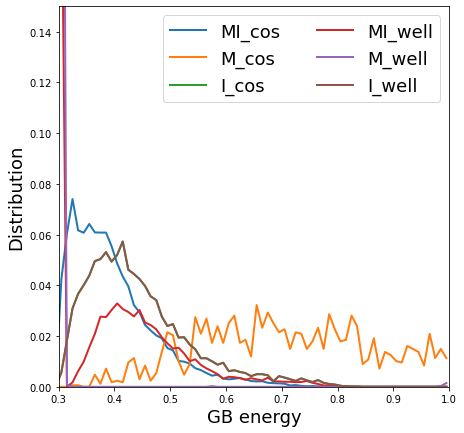

<Figure size 432x288 with 0 Axes>

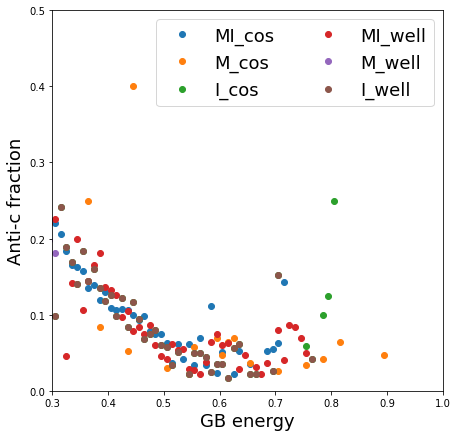

In [7]:
# plot
plt.figure()
fig = plt.figure(figsize=(7, 7))
plt.xlim([0.3,1.0])
plt.ylim([0,0.15])
for i in range(len(case_name_list)):
    plt.plot(GBenergy_coordinate, frequency_array[i]/np.sum(frequency_array[i]),'-', linewidth=2,color=f'C{i}', label=label_name_list[i])
plt.legend(ncol=2,fontsize=18)
plt.xlabel("GB energy", fontsize=18)
plt.ylabel("Distribution", fontsize=18)
figure_name_frequency = f"figures/Frequency_lowEGB_comparison_6_cases.png"
plt.savefig(figure_name_frequency, dpi=400,bbox_inches='tight')

plt.figure()
fig = plt.figure(figsize=(7, 7))
plt.xlim([0.3,1.0])
plt.ylim([0,0.5])
for i in range(len(case_name_list)):
    plt.plot(GBenergy_coordinate[anti_c_fraction_array[i]>0], anti_c_fraction_array[i][anti_c_fraction_array[i]>0],'o', linewidth=2,color=f'C{i}', label=label_name_list[i])
plt.legend(ncol=2,fontsize=18)
plt.xlabel("GB energy", fontsize=18)
plt.ylabel("Anti-c fraction", fontsize=18)
figure_name_fraction = f"figures/Anti_c_fraction_over_GBE_comparison_6_cases.png"
plt.savefig(figure_name_fraction, dpi=400,bbox_inches='tight')
